In [57]:
import pandas as pd
import os

#### Merge 12 months of sales data into one file

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]
total_month_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    total_month_data = pd.concat([total_month_data, df])

total_month_data.to_csv("total_data.csv", index=False)

#### Read in updated dataframe

In [4]:
total_data = pd.read_csv("total_data.csv")

#### Clean up the data(drop rows of NAN)

In [5]:
nan_df = total_data[total_data.isna().any(axis=1)]
nan_df.head()

total_data = total_data.dropna(how='any')

#### Find 'Or' and drop them

In [6]:
total_data = total_data[total_data['Order Date'].str[0:2] != 'Or']

#### Add month column

In [7]:
total_data['Month'] = total_data['Order Date'].str[0:2]
total_data['Month'] = total_data['Month'].astype('int32')
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Covert columns to the correct type

In [8]:
total_data['Quantity Ordered'] = pd.to_numeric(total_data['Quantity Ordered'])
total_data['Price Each'] = pd.to_numeric(total_data['Price Each'])

#### Add a sales column

In [18]:
total_data['Sales'] = total_data['Quantity Ordered'] * total_data['Price Each']
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a city&state column

In [38]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

total_data['City'] = total_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Q1: What's the best month for sales? How much was earned for that month?

In [23]:
result = total_data.groupby('Month').sum()
result['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

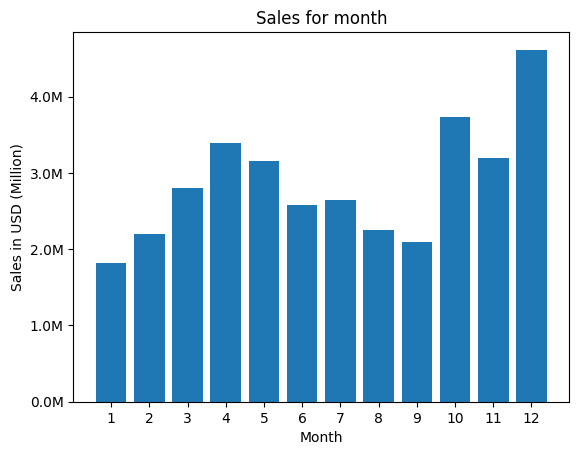

In [39]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD (Million)' )
plt.xlabel('Month')
plt.title('Sales for month')


def millions(x, pos):
    """
    Function to format the tick labels in millions.
    :param x: The value of the tick.
    :param pos: The position of the tick (not used here).
    :return: A string representation of the value in millions.
    """
    return '{:1.1f}M'.format(x*1e-6)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

#### Q2: Which city has the hightest number of sales?

In [46]:
result1 = total_data.groupby('City').sum()

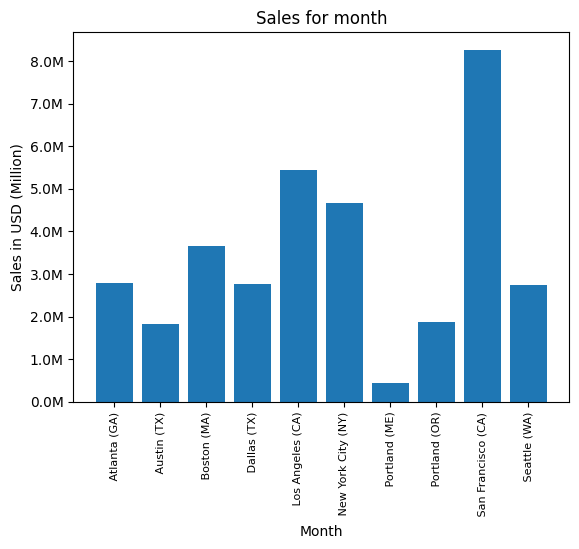

In [55]:

cities = [city for city, df in total_data.groupby('City')]

plt.bar(cities, result1['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD (Million)' )
plt.xlabel('Month')
plt.title('Sales for month')



plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

#### Q3: What time should we advertise to maximize likelihood of custimoer's purchase?

In [85]:
total_data['Order Date'] = pd.to_datetime(total_data['Order Date'])
total_data['Hours'] = total_data['Order Date'].dt.hour
total_data['Minutes'] = total_data['Order Date'].dt.minute
total_data['Count'] = 1


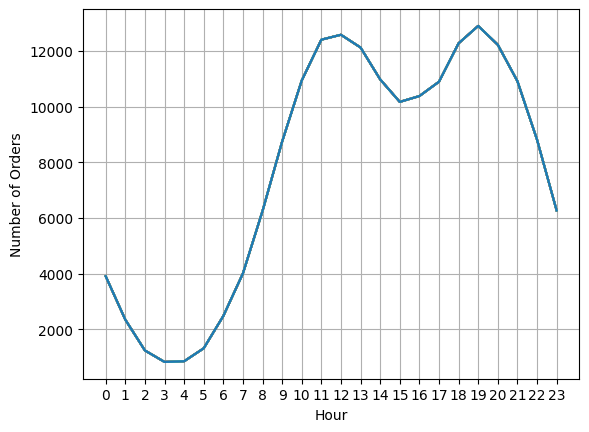

In [86]:
hours = [hour for hour, df in total_data.groupby('Hours')]
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.plot(hours, total_data.groupby(['Hours']).count())

#### A: 11-19 is a good time to advertise

#### Q4: What products are the most often sold together? 

In [87]:
df = total_data[total_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\45235\AppData\Local\Temp\ipykernel_9928\3317489472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [88]:
from itertools import combinations
from collections import Counter

counter = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    counter.update(Counter(combinations(row_list, 2)))

for key, value in counter.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### Q5: What product sold the most? 

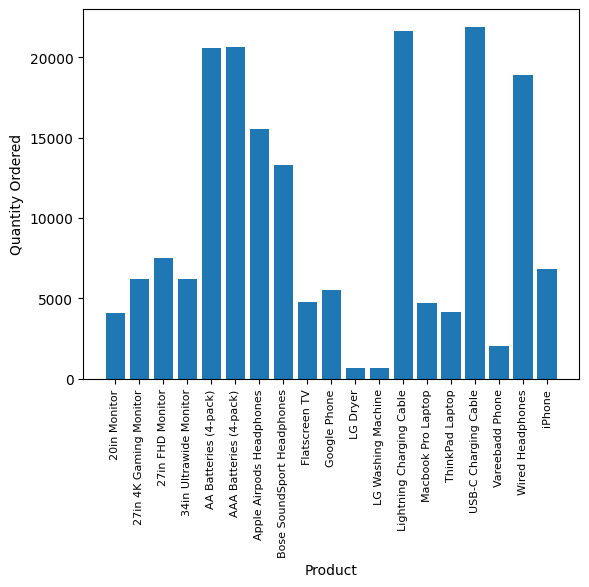

In [103]:

product_group = total_data.groupby('Product')

quantity_ordered = product_group.count()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()